In [56]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import woe
import warnings
warnings.filterwarnings("ignore")

In [57]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [69]:
## load data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [70]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [71]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))
print ('----------------------------')
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The train data has 13645 rows and 22 columns
----------------------------
The test data has 8745 rows and 20 columns


In [72]:
## check missing values
train.columns[train.isnull().any()]

Index(['BiasInfluentialFactor'], dtype='object')

In [73]:
train['BiasInfluentialFactor'] = train['BiasInfluentialFactor'].fillna('None')

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [75]:
# Selecting duplicate rows except first 
# occurrence based on all columns
duplicate = train[train.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent


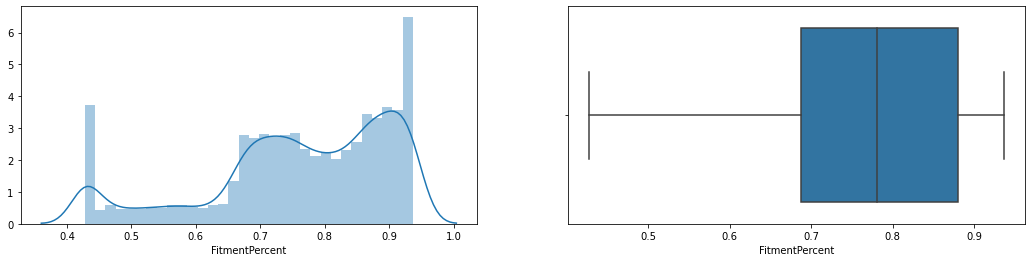

In [76]:
## FitmentPercent        
f, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(18, 4))
train['FitmentPercent'] = train['FitmentPercent'] / 100


#train['FitmentPercent'] = np.sqrt(train['FitmentPercent'])

## Capping the outlier rows with Percentiles
upper_lim = train['FitmentPercent'].quantile(.95)
lower_lim = train['FitmentPercent'].quantile(.05)
train.loc[(train['FitmentPercent'] > upper_lim),'FitmentPercent'] = upper_lim
train.loc[(train['FitmentPercent'] < lower_lim),'FitmentPercent'] = lower_lim


sns.distplot(train['FitmentPercent'], ax=ax[0])
sns.boxplot(train['FitmentPercent'], ax=ax[1])

In [77]:
## skewness
print("The skewness of SalePrice is {}".format(train['FitmentPercent'].skew()))

The skewness of SalePrice is -0.838006159121367


In [78]:
train['ExpectedRaise%'] = round((train['ExpectedCTC'] - train['CurrentCTC']) / train['CurrentCTC'] * 100)   

In [13]:
col = 'YearsOfExperince'
conditions = [train[col] <= 3, train[col] <= 6, train[col] <= 10]
choices = ['1-3', '4-6', '7-10']  
train['YearsOfExperince_bin'] = np.select(conditions, choices, default = '11-15') 
train['YearsOfExperince_bin'] = train['YearsOfExperince_bin'].astype(str)        

In [14]:
train['YearsOfExperince_bin'].value_counts()

7-10     4579
4-6      3484
1-3      3293
11-15    2289
Name: YearsOfExperince_bin, dtype: int64

In [15]:
train['DegreeBranch'].value_counts()

Computer Science              4749
Information Technology        2993
Artificial Intelligence       2001
Electrical                    1803
Electronics                   1699
Electrical and Electronics     400
Name: DegreeBranch, dtype: int64

In [16]:
train[train['HighestDegree'].isin(['BCA', 'MCA'])][['HighestDegree', 'DegreeBranch']].drop_duplicates()

,HighestDegree,DegreeBranch
3,BCA,Information Technology
5,BCA,Computer Science
36,BCA,Electronics
37,BCA,Artificial Intelligence
113,BCA,Electrical and Electronics
174,BCA,Electrical
263,MCA,Electronics
483,MCA,Computer Science
1313,MCA,Artificial Intelligence
1408,MCA,Information Technology


In [17]:
train['DegreeBranch'] = np.where((train['HighestDegree'].isin(['BCA', 'MCA'])) & (train['DegreeBranch'].isin(['Electrical', 'Electronics', 'Electrical and Electronics'])), 'Computer Science', train['DegreeBranch'])

In [18]:
df = train[['EmpID', 'DegreeBranch', 'HighestDegree']].groupby(['DegreeBranch', 'HighestDegree']).count()
df =  pd.pivot_table(df, values = 'EmpID', index = ['HighestDegree'], columns = ['DegreeBranch'], aggfunc = np.sum, fill_value = 0)
df

DegreeBranch,Artificial Intelligence,Computer Science,Electrical,Electrical and Electronics,Electronics,Information Technology
HighestDegree,,,,,,
B.Tech,845,1946,706,166,727,1229
BCA,224,1060,0,0,0,350
Dual M.Tech,194,507,172,39,156,290
Dual MBA,84,238,101,11,78,153
M.Tech,275,686,276,69,251,469
MCA,23,86,0,0,0,31
MS,248,523,205,41,209,353
PhD,108,211,91,23,73,118


In [19]:
df = train[['EmpID', 'CurrentDesignation', 'DepartmentInCompany']].groupby(['CurrentDesignation', 'DepartmentInCompany']).count()
df =  pd.pivot_table(df, values = 'EmpID', index = ['CurrentDesignation'], columns = ['DepartmentInCompany'], aggfunc = np.sum, fill_value = 0)
df

DepartmentInCompany,Customer Success,Design,Engineering,Finance,Product
CurrentDesignation,,,,,
BA,174,562,719,89,166
DA,28,82,131,21,25
DE,12,46,54,11,12
DS,194,570,713,73,166
EM,169,449,525,70,129
SDE,626,1731,2293,288,485
SEM,36,90,124,17,20
SSE,331,863,1190,132,229


In [20]:
## separate variables into new data frames
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])
del cat_data['EmpName']  
del cat_data['YearsOfExperince_bin']
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 11 numeric and 11 categorical columns in train data


In [21]:
numeric_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EmpID,13645.0,13150.781239,6475.019626,2001.00000,7501.0000,13173.0000,18718.0000,24390.0000
Age,13645.0,30.691242,3.881378,24.00000,28.0000,31.0000,34.0000,42.0000
LatestDegreeCGPA,13645.0,7.100257,1.346539,4.00000,6.0000,7.0000,8.0000,10.0000
YearsOfExperince,13645.0,6.547746,3.426920,1.00000,4.0000,7.0000,9.0000,12.0000
GraduationYear,13645.0,2014.452254,3.426920,2009.00000,2012.0000,2014.0000,2017.0000,2020.0000
CurrentCTC,13645.0,18.076951,7.208130,6.00000,12.0000,18.0000,24.0000,30.0000
ExpectedCTC,13645.0,25.061488,7.478119,10.00000,19.0000,25.0000,31.0000,40.0000
EmpScore,13645.0,3.392085,1.044676,1.00000,3.0000,3.0000,4.0000,5.0000
TotalLeavesTaken,13645.0,11.967021,4.897836,4.00000,8.0000,12.0000,16.0000,20.0000
FitmentPercent,13645.0,0.760722,0.142628,0.42764,0.6872,0.7811,0.8799,0.9369


In [22]:
cat_data.describe().transpose()

,count,unique,top,freq
LanguageOfCommunication,13645,3,English,7510
Gender,13645,3,Male,8376
JobProfileIDApplyingFor,13645,9,JR85289,4697
HighestDegree,13645,8,B.Tech,5619
DegreeBranch,13645,6,Computer Science,5257
GraduatingInstitute,13645,3,Tier 2,6092
MartialStatus,13645,2,Married,9810
CurrentDesignation,13645,8,SDE,5423
CurrentCompanyType,13645,3,Startup,6373
DepartmentInCompany,13645,5,Engineering,5749


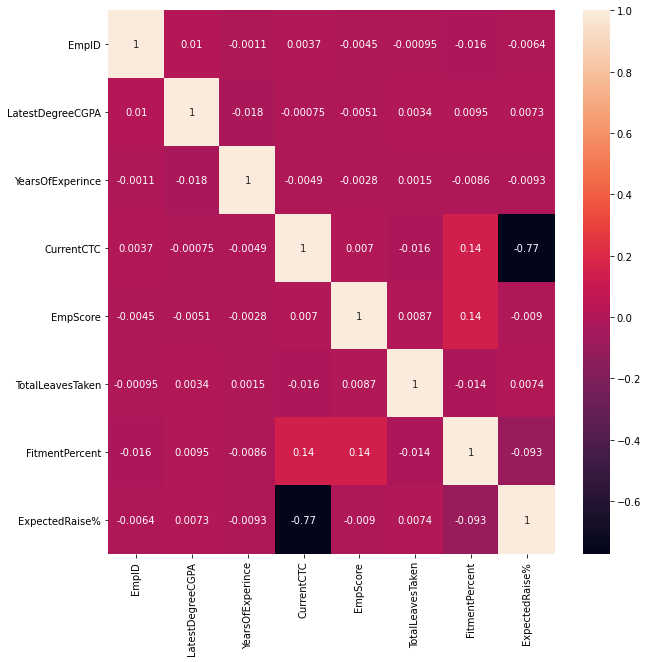

In [23]:
## correlation plot
fig, ax = plt.subplots(figsize=(10,10))
del numeric_data['ExpectedCTC']
del numeric_data['GraduationYear']
del numeric_data['Age']
corr = numeric_data.corr()
sns.heatmap(corr, annot=True)

In [24]:
## Highly correlated
corr_matrix = train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print('Correlated features: ', to_drop)

Correlated features:  ['YearsOfExperince', 'GraduationYear', 'ExpectedCTC']


In [25]:
print(corr['FitmentPercent'].sort_values(ascending=False), '\n') 

FitmentPercent      1.000000
CurrentCTC          0.142812
EmpScore            0.142616
LatestDegreeCGPA    0.009467
YearsOfExperince   -0.008578
TotalLeavesTaken   -0.014244
EmpID              -0.016203
ExpectedRaise%     -0.093318
Name: FitmentPercent, dtype: float64 



                   features      pval  disparity
1                    Gender  0.000000        inf
8        CurrentCompanyType  0.000000        inf
10    BiasInfluentialFactor  0.000000        inf
6             MartialStatus  0.150646   1.892823
2   JobProfileIDApplyingFor  0.244808   1.407280
3             HighestDegree  0.264658   1.329316
5       GraduatingInstitute  0.435039   0.832319
7        CurrentDesignation  0.484302   0.725046
9       DepartmentInCompany  0.541490   0.613430
4              DegreeBranch  0.688606   0.373086
0   LanguageOfCommunication  0.780627   0.247658


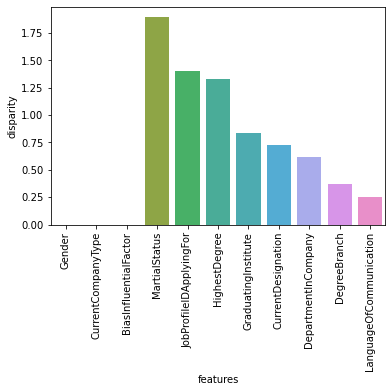

In [26]:
cat = [f for f in train.columns if train.dtypes[f] == 'object']
cat.remove('EmpName')
cat.remove('YearsOfExperince_bin')

## ANOVA test to understand the correlation between categorical variables and FitmentPercent. 
## Ho - There exists no significant difference between the groups. 
## Ha - There exists a significant difference between the groups.
## Higher the disparity score, better the feature in prediction. 
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
        samples = []
        for cls in frame[c].unique():
                s = frame[frame[c] == cls]['FitmentPercent'].values
                samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['FitmentPercent'] = train.FitmentPercent.values
k = anova(cat_data) 
k['disparity'] = np.log(1/k['pval'].values)
print(k)
sns.barplot(data=k, x='features', y='disparity') 
plt.xticks(rotation=90) 
plt.show()

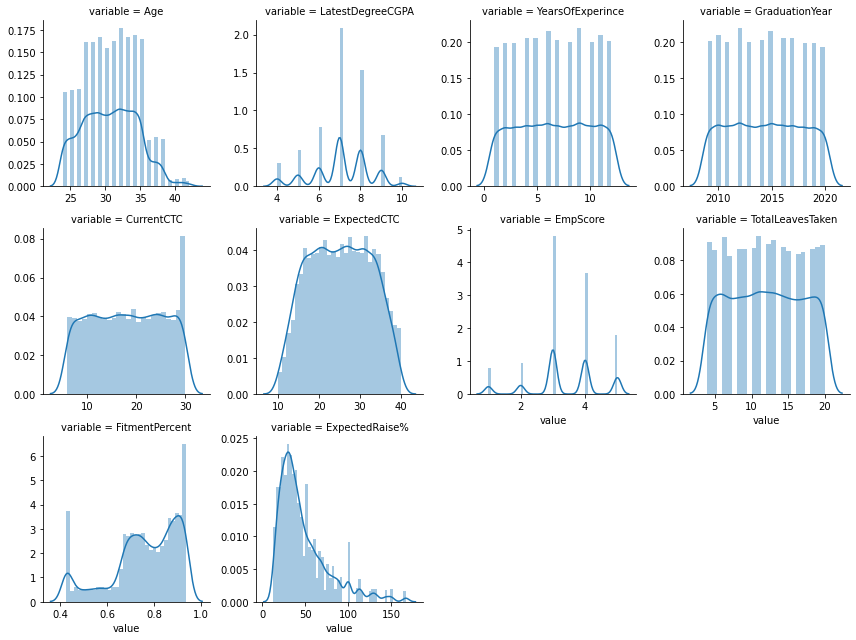

In [27]:
## create numeric plots
num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('EmpID')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

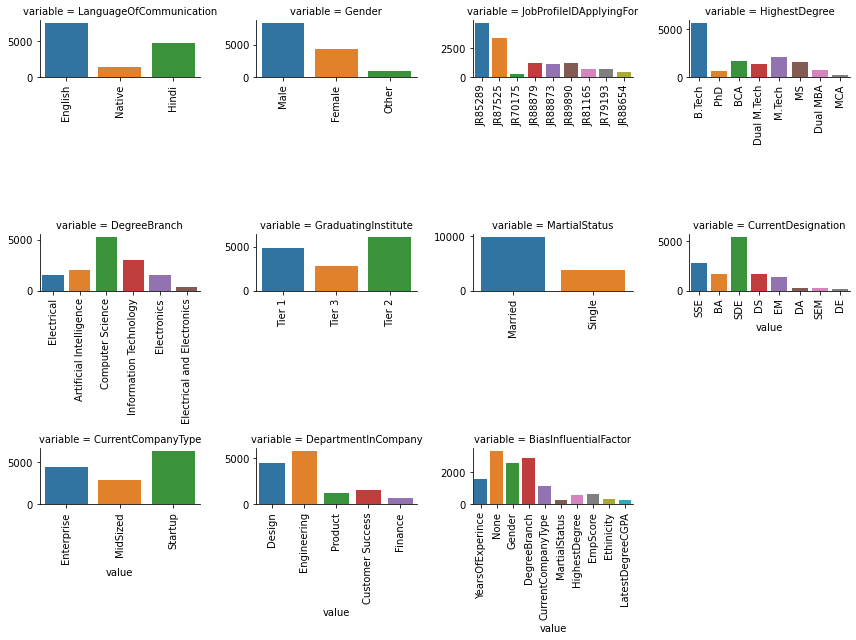

In [28]:
## create count plots
def countplot(x,**kwargs):
            sns.countplot(x=x)
            x = plt.xticks(rotation=90)
            
nd = pd.melt(train, value_vars = cat)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey=False)
n1 = n1.map(countplot, 'value')
n1

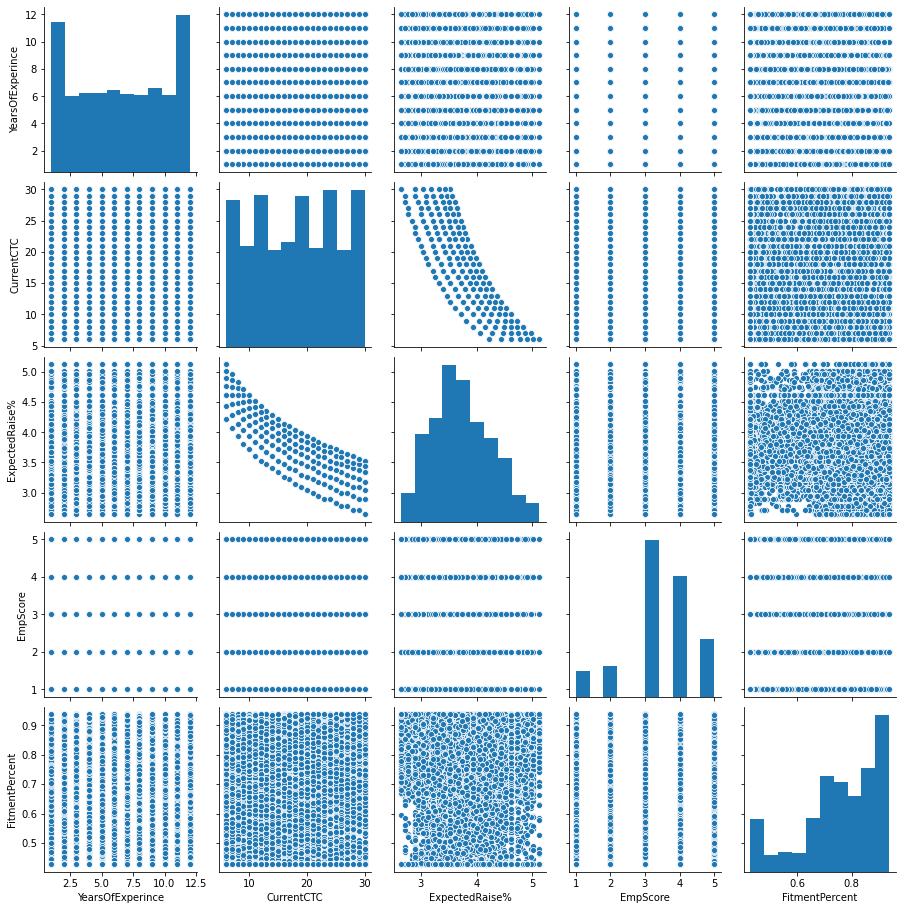

In [53]:
sns.pairplot(train[['YearsOfExperince', 'CurrentCTC', 'ExpectedRaise%', 'EmpScore', 'FitmentPercent']])

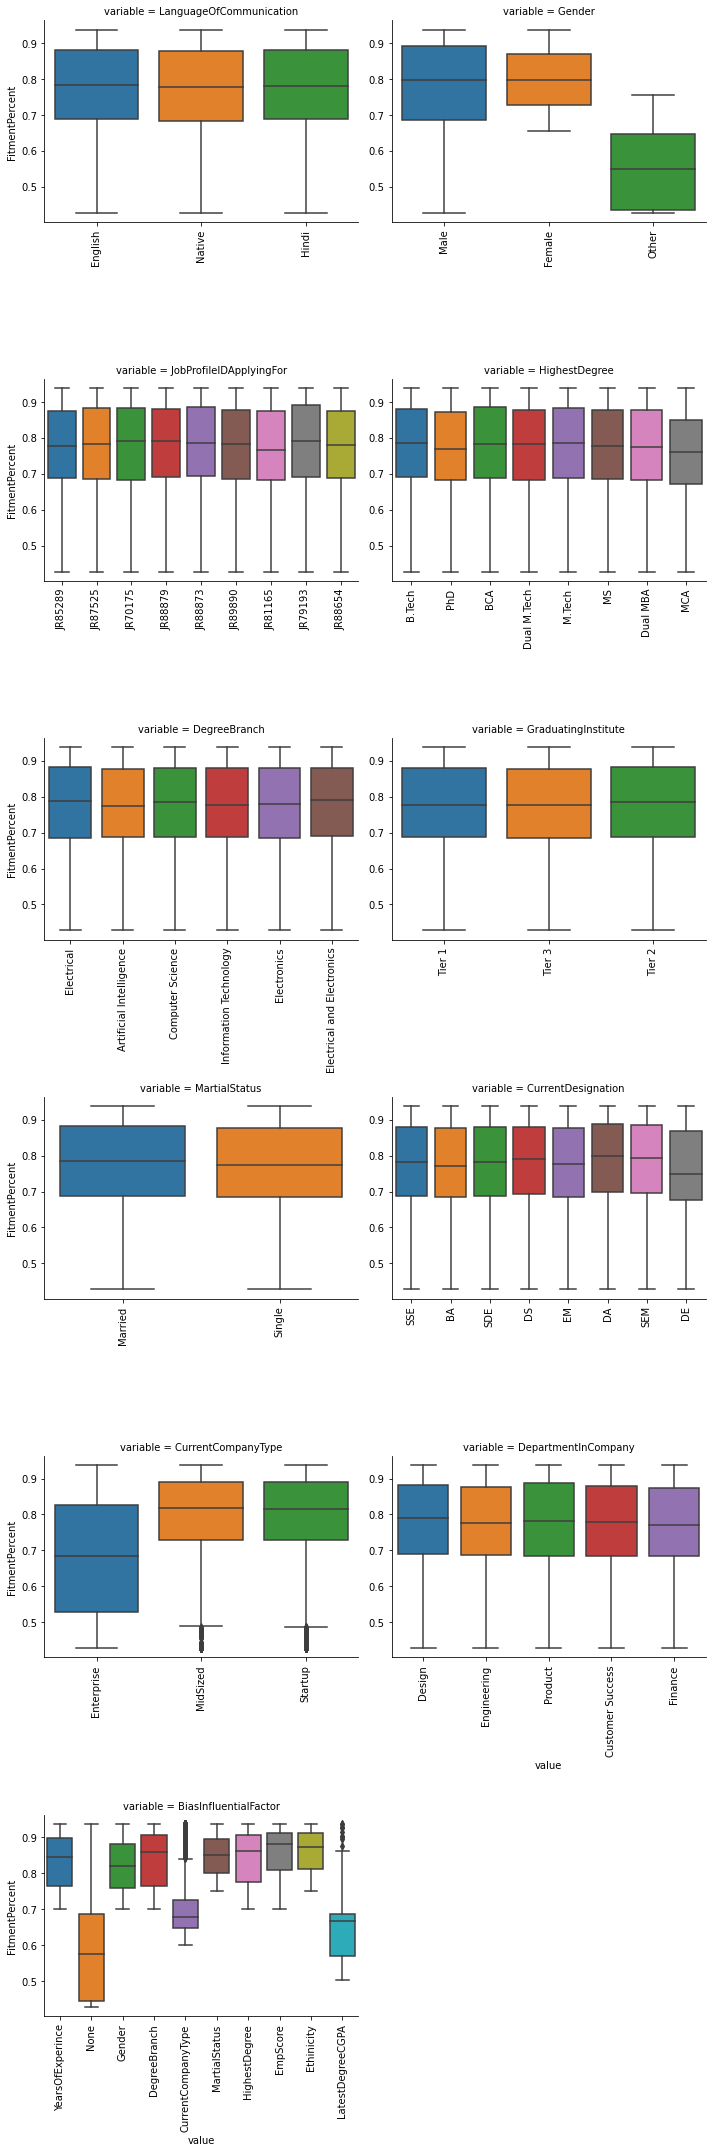

In [30]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']
cat.remove('EmpName')
cat.remove('YearsOfExperince_bin')
p = pd.melt(train, id_vars='FitmentPercent', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','FitmentPercent')
g

In [31]:
## check YearsOfExperince and GraduationYear
e = train[['EmpID', 'YearsOfExperince_bin', 'GraduationYear']].groupby(['YearsOfExperince_bin','GraduationYear']).agg(['count'])
e =  pd.pivot_table(e, values = 'EmpID', index = ['YearsOfExperince_bin'], columns = ['GraduationYear'], aggfunc = np.sum, fill_value = 0)
e['Total'] = e.sum(axis=1)
for i in e.columns:
    e[i] = round((e[i] / e['Total']) * 100)
e

count                                                  \
GraduationYear        2009  2010  2011  2012  2013  2014  2015  2016  2017   
YearsOfExperince_bin                                                         
1-3                    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
11-15                 49.0  51.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4-6                    0.0   0.0   0.0   0.0   0.0   0.0  34.0  33.0  33.0   
7-10                   0.0   0.0  24.0  27.0  24.0  25.0   0.0   0.0   0.0   

                                        Total  
GraduationYear        2018  2019  2020         
YearsOfExperince_bin                           
1-3                   34.0  34.0  33.0  100.0  
11-15                  0.0   0.0   0.0  100.0  
4-6                    0.0   0.0   0.0  100.0  
7-10                   0.0   0.0   0.0  100.0

In [32]:
## check age and highest degree
train['Age_bin'] = pd.cut(train['Age'],10, precision=0)
e = train[['EmpID', 'Age_bin', 'HighestDegree']].groupby(['Age_bin','HighestDegree']).agg(['count'])
e =  pd.pivot_table(e, values = 'EmpID', index = ['Age_bin'], columns = ['HighestDegree'], aggfunc = np.sum, fill_value = 0)
e['Total'] = e.sum(axis=1)
for i in e.columns:
    e[i] = round((e[i] / e['Total']) * 100)
e

count                                                      \
HighestDegree B.Tech   BCA Dual M.Tech Dual MBA M.Tech  MCA    MS    PhD   
Age_bin                                                                    
(24.0, 26.0]    62.0  18.0        13.0      8.0    0.0  0.0   0.0    0.0   
(26.0, 28.0]    52.0  14.0        12.0      6.0    9.0  0.0   7.0    0.0   
(28.0, 29.0]    44.0  13.0        10.0      5.0   15.0  1.0  12.0    0.0   
(29.0, 31.0]    41.0  12.0        12.0      4.0   15.0  1.0  13.0    2.0   
(31.0, 33.0]    40.0  13.0        11.0      5.0   15.0  1.0  11.0    5.0   
(33.0, 35.0]    41.0  11.0        11.0      4.0   15.0  1.0  12.0    4.0   
(35.0, 37.0]    32.0   9.0         7.0      4.0   22.0  1.0  18.0    7.0   
(37.0, 38.0]     0.0   0.0         0.0      0.0   48.0  3.0  35.0   14.0   
(38.0, 40.0]     0.0   0.0         0.0      0.0    0.0  0.0   0.0  100.0   
(40.0, 42.0]     0.0   0.0         0.0      0.0    0.0  0.0   0.0  100.0   

               Total  
HighestDegree         
Age_bin               
(24.0, 26.0]   100.0  
(26.0, 28.0]   100.0  
(28.0, 29.0]   100.0  
(29.0, 31.0]   100.0  
(31.0, 33.0]   100.0  
(33.0, 35.0]   100.0  
(35.0, 37.0]   100.0  
(37.0, 38.0]   100.0  
(38.0, 40.0]   100.0  
(40.0, 42.0]   100.0

In [33]:
## current designation, 1 years of experience, company type
e = train[(train['YearsOfExperince'] == 1) & (train['CurrentDesignation'].isin(['EM','SEM']))]
e[['EmpID', 'YearsOfExperince', 'CurrentDesignation', 'CurrentCompanyType', 'HighestDegree']].groupby(['YearsOfExperince','CurrentDesignation','CurrentCompanyType','HighestDegree']).agg(['count'])

EmpID
                                                                     count
YearsOfExperince CurrentDesignation CurrentCompanyType HighestDegree      
1                EM                 Enterprise         B.Tech           17
                                                       BCA               3
                                                       Dual M.Tech       5
                                                       Dual MBA          6
                                                       M.Tech            5
                                                       MS                7
                                                       PhD               1
                                    MidSized           B.Tech            6
                                                       BCA               2
                                                       Dual M.Tech       3
                                                       Dual MBA          1
                                                       M.Tech            2
                                                       MS                2
                                                       PhD               1
                                    Startup            B.Tech           24
                                                       BCA               5
                                                       Dual M.Tech       6
                                                       Dual MBA          4
                                                       M.Tech            6
                                                       MS                6
                                                       PhD               2
                 SEM                Enterprise         B.Tech            3
                                                       M.Tech            1
                                                       MS                1
                                                       PhD               1
                                    MidSized           B.Tech            1
                                                       M.Tech            1
                                                       MS                1
                                    Startup            B.Tech           11
                                                       BCA               1
                                                       M.Tech            1
                                                       MS                1

In [34]:
## Current Designation vs YearsOfExperience
e = train[['EmpID', 'YearsOfExperince_bin', 'CurrentDesignation']].groupby(['YearsOfExperince_bin','CurrentDesignation']).agg(['count'])
e =  pd.pivot_table(e, values = 'EmpID', index = ['YearsOfExperince_bin'], columns = ['CurrentDesignation'], aggfunc = np.sum, fill_value = 0)
e['Total'] = e.sum(axis=1)
for i in e.columns[~e.columns.isin([('Total',     '')])]:
    e[str(i) + '%'] = round((e[i] / e['Total']) * 100)
e

count                                    Total  \
CurrentDesignation      BA   DA  DE   DS   EM   SDE  SEM  SSE         
YearsOfExperince_bin                                                  
1-3                    402   60  31  434  347  1300   70  649  3293   
11-15                  280   45  23  298  213   918   45  467  2289   
4-6                    457   73  44  410  348  1369   66  717  3484   
7-10                   571  109  37  574  434  1836  106  912  4579   

                     ('count', 'BA')% ('count', 'DA')% ('count', 'DE')%  \
CurrentDesignation                                                        
YearsOfExperince_bin                                                      
1-3                              12.0              2.0              1.0   
11-15                            12.0              2.0              1.0   
4-6                              13.0              2.0              1.0   
7-10                             12.0              2.0              1.0   

                     ('count', 'DS')% ('count', 'EM')% ('count', 'SDE')%  \
CurrentDesignation                                                         
YearsOfExperince_bin                                                       
1-3                              13.0             11.0              39.0   
11-15                            13.0              9.0              40.0   
4-6                              12.0             10.0              39.0   
7-10                             13.0              9.0              40.0   

                     ('count', 'SEM')% ('count', 'SSE')%  
CurrentDesignation                                        
YearsOfExperince_bin                                      
1-3                                2.0              20.0  
11-15                              2.0              20.0  
4-6                                2.0              21.0  
7-10                               2.0              20.0

In [52]:
e = train[['EmpID', 'YearsOfExperince_bin', 'CurrentCompanyType']].groupby(['YearsOfExperince_bin','CurrentCompanyType']).agg(['count'])
e =  pd.pivot_table(e, values = 'EmpID', index = ['CurrentCompanyType'], columns = ['YearsOfExperince_bin'], aggfunc = np.sum, fill_value = 0)
e['Total'] = e.sum(axis=1)
for i in e.columns[~e.columns.isin([('Total',     '')])]:
    e[str(i) + '%'] = round((e[i] / e['Total']) * 100)
e

count                   Total ('count', '1-3')%  \
YearsOfExperince_bin   1-3 11-15   4-6  7-10                           
CurrentCompanyType                                                     
Enterprise            1066   727  1148  1454  4395              24.0   
MidSized               675   478   754   970  2877              23.0   
Startup               1552  1084  1582  2155  6373              24.0   

                     ('count', '11-15')% ('count', '4-6')% ('count', '7-10')%  
YearsOfExperince_bin                                                           
CurrentCompanyType                                                             
Enterprise                          17.0              26.0               33.0  
MidSized                            17.0              26.0               34.0  
Startup                             17.0              25.0               34.0

In [36]:
train['FitmentProb'] = pd.qcut(train['FitmentPercent'], 10)
df = train[['EmpID', 'FitmentProb', 'BiasInfluentialFactor']].groupby(['FitmentProb', 'BiasInfluentialFactor']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['FitmentProb'], columns = ['BiasInfluentialFactor'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
df

count                                   \
BiasInfluentialFactor CurrentCompanyType DegreeBranch EmpScore Ethinicity   
FitmentProb                                                                 
(0.427, 0.526]                         0            0        0          0   
(0.526, 0.669]                       494            0        0          0   
(0.669, 0.706]                       344           79        9          0   
(0.706, 0.742]                        73          386       70          0   
(0.742, 0.781]                        36          366       56         47   
(0.781, 0.827]                        18          330       50         56   
(0.827, 0.865]                        29          353       73         43   
(0.865, 0.894]                        65          422      136         61   
(0.894, 0.922]                        51          451      139         52   
(0.922, 0.937]                        64          471      126         69   

                                                                           \
BiasInfluentialFactor Gender HighestDegree LatestDegreeCGPA MartialStatus   
FitmentProb                                                                 
(0.427, 0.526]             0             0               26             0   
(0.526, 0.669]             0             0              109             0   
(0.669, 0.706]            62            10               88             0   
(0.706, 0.742]           394            78               12             0   
(0.742, 0.781]           434            68                7            41   
(0.781, 0.827]           474            65                7            61   
(0.827, 0.865]           429            81                4            54   
(0.865, 0.894]           294            93                1            51   
(0.894, 0.922]           288            87                4            35   
(0.922, 0.937]           230           100                4            38   

                                             Total  
BiasInfluentialFactor  None YearsOfExperince        
FitmentProb                                         
(0.427, 0.526]         1339                0  1365  
(0.526, 0.669]          763                0  1366  
(0.669, 0.706]          732               39  1363  
(0.706, 0.742]          135              217  1365  
(0.742, 0.781]          102              210  1367  
(0.781, 0.827]           79              222  1362  
(0.827, 0.865]           68              229  1363  
(0.865, 0.894]           38              208  1369  
(0.894, 0.922]           39              214  1360  
(0.922, 0.937]           41              222  1365

In [37]:
train['ExpectedRaise%'] = np.log(train['ExpectedRaise%'] + 1)
df = train[['EmpID', 'FitmentProb', 'CurrentCompanyType']].groupby(['FitmentProb', 'CurrentCompanyType']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['FitmentProb'], columns = ['CurrentCompanyType'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns[~df.columns.isin([('Total',     '')])]:
    df[str(i) + '%'] = round((df[i] / df['Total']) * 100)
df

count                  Total ('count', 'Enterprise')%  \
CurrentCompanyType Enterprise MidSized Startup                                  
FitmentProb                                                                     
(0.427, 0.526]           1086       88     191  1365                     80.0   
(0.526, 0.669]            944      124     298  1366                     69.0   
(0.669, 0.706]            392      319     652  1363                     29.0   
(0.706, 0.742]            389      292     684  1365                     28.0   
(0.742, 0.781]            273      328     766  1367                     20.0   
(0.781, 0.827]            213      371     778  1362                     16.0   
(0.827, 0.865]            226      354     783  1363                     17.0   
(0.865, 0.894]            277      323     769  1369                     20.0   
(0.894, 0.922]            292      310     758  1360                     21.0   
(0.922, 0.937]            303      368     694  1365                     22.0   

                   ('count', 'MidSized')% ('count', 'Startup')%  
CurrentCompanyType                                               
FitmentProb                                                      
(0.427, 0.526]                        6.0                  14.0  
(0.526, 0.669]                        9.0                  22.0  
(0.669, 0.706]                       23.0                  48.0  
(0.706, 0.742]                       21.0                  50.0  
(0.742, 0.781]                       24.0                  56.0  
(0.781, 0.827]                       27.0                  57.0  
(0.827, 0.865]                       26.0                  57.0  
(0.865, 0.894]                       24.0                  56.0  
(0.894, 0.922]                       23.0                  56.0  
(0.922, 0.937]                       27.0                  51.0

In [38]:
df = train[['EmpID', 'FitmentProb', 'Gender']].groupby(['FitmentProb', 'Gender']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['FitmentProb'], columns = ['Gender'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns[~df.columns.isin([('Total',     '')])]:
    df[str(i) + '%'] = round((df[i] / df['Total']) * 100)
df

count             Total ('count', 'Female')%  \
Gender         Female  Male Other                              
FitmentProb                                                    
(0.427, 0.526]      0   949   416  1365                  0.0   
(0.526, 0.669]    220   807   339  1366                 16.0   
(0.669, 0.706]    549   725    89  1363                 40.0   
(0.706, 0.742]    551   748    66  1365                 40.0   
(0.742, 0.781]    605   729    33  1367                 44.0   
(0.781, 0.827]    691   671     0  1362                 51.0   
(0.827, 0.865]    572   791     0  1363                 42.0   
(0.865, 0.894]    415   954     0  1369                 30.0   
(0.894, 0.922]    412   948     0  1360                 30.0   
(0.922, 0.937]    311  1054     0  1365                 23.0   

               ('count', 'Male')% ('count', 'Other')%  
Gender                                                 
FitmentProb                                            
(0.427, 0.526]               70.0                30.0  
(0.526, 0.669]               59.0                25.0  
(0.669, 0.706]               53.0                 7.0  
(0.706, 0.742]               55.0                 5.0  
(0.742, 0.781]               53.0                 2.0  
(0.781, 0.827]               49.0                 0.0  
(0.827, 0.865]               58.0                 0.0  
(0.865, 0.894]               70.0                 0.0  
(0.894, 0.922]               70.0                 0.0  
(0.922, 0.937]               77.0                 0.0

In [39]:
df = train[['EmpID', 'FitmentProb', 'EmpScore']].groupby(['FitmentProb', 'EmpScore']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['FitmentProb'], columns = ['EmpScore'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns[~df.columns.isin([('Total',     '')])]:
    df[str(i) + '%'] = round((df[i] / df['Total']) * 100)
df

count                     Total ('count', 1)% ('count', 2)%  \
EmpScore           1    2    3    4    5                                     
FitmentProb                                                                  
(0.427, 0.526]   110  133  643  331  148  1365           8.0          10.0   
(0.526, 0.669]   102  107  624  370  163  1366           7.0           8.0   
(0.669, 0.706]   114  127  583  363  176  1363           8.0           9.0   
(0.706, 0.742]   104  119  652  326  164  1365           8.0           9.0   
(0.742, 0.781]   106  130  614  352  165  1367           8.0          10.0   
(0.781, 0.827]    97  131  621  341  172  1362           7.0          10.0   
(0.827, 0.865]    89   94  544  424  212  1363           7.0           7.0   
(0.865, 0.894]    66   75  399  548  281  1369           5.0           5.0   
(0.894, 0.922]    65   68  411  548  268  1360           5.0           5.0   
(0.922, 0.937]    57   80  371  581  276  1365           4.0           6.0   

               ('count', 3)% ('count', 4)% ('count', 5)%  
EmpScore                                                  
FitmentProb                                               
(0.427, 0.526]          47.0          24.0          11.0  
(0.526, 0.669]          46.0          27.0          12.0  
(0.669, 0.706]          43.0          27.0          13.0  
(0.706, 0.742]          48.0          24.0          12.0  
(0.742, 0.781]          45.0          26.0          12.0  
(0.781, 0.827]          46.0          25.0          13.0  
(0.827, 0.865]          40.0          31.0          16.0  
(0.865, 0.894]          29.0          40.0          21.0  
(0.894, 0.922]          30.0          40.0          20.0  
(0.922, 0.937]          27.0          43.0          20.0

In [40]:
df = train[['EmpID', 'FitmentProb', 'LatestDegreeCGPA']].groupby(['FitmentProb', 'LatestDegreeCGPA']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['FitmentProb'], columns = ['LatestDegreeCGPA'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns[~df.columns.isin([('Total',     '')])]:
    df[str(i) + '%'] = round((df[i] / df['Total']) * 100)
df

count                              Total ('count', 4)%  \
LatestDegreeCGPA     4    5    6    7    8    9  10                       
FitmentProb                                                               
(0.427, 0.526]      78  108  190  494  322  142  31  1365           6.0   
(0.526, 0.669]      72   98  172  501  323  175  25  1366           5.0   
(0.669, 0.706]      64  105  172  481  347  160  34  1363           5.0   
(0.706, 0.742]      64  114  155  492  354  159  27  1365           5.0   
(0.742, 0.781]      73  111  193  471  350  136  33  1367           5.0   
(0.781, 0.827]      71  101  173  470  368  144  35  1362           5.0   
(0.827, 0.865]      81  112  181  462  348  152  27  1363           6.0   
(0.865, 0.894]      84  111  184  445  364  157  24  1369           6.0   
(0.894, 0.922]      65  113  177  460  349  169  27  1360           5.0   
(0.922, 0.937]      61  116  182  462  355  160  29  1365           4.0   

                 ('count', 5)% ('count', 6)% ('count', 7)% ('count', 8)%  \
LatestDegreeCGPA                                                           
FitmentProb                                                                
(0.427, 0.526]             8.0          14.0          36.0          24.0   
(0.526, 0.669]             7.0          13.0          37.0          24.0   
(0.669, 0.706]             8.0          13.0          35.0          25.0   
(0.706, 0.742]             8.0          11.0          36.0          26.0   
(0.742, 0.781]             8.0          14.0          34.0          26.0   
(0.781, 0.827]             7.0          13.0          35.0          27.0   
(0.827, 0.865]             8.0          13.0          34.0          26.0   
(0.865, 0.894]             8.0          13.0          33.0          27.0   
(0.894, 0.922]             8.0          13.0          34.0          26.0   
(0.922, 0.937]             8.0          13.0          34.0          26.0   

                 ('count', 9)% ('count', 10)%  
LatestDegreeCGPA                               
FitmentProb                                    
(0.427, 0.526]            10.0            2.0  
(0.526, 0.669]            13.0            2.0  
(0.669, 0.706]            12.0            2.0  
(0.706, 0.742]            12.0            2.0  
(0.742, 0.781]            10.0            2.0  
(0.781, 0.827]            11.0            3.0  
(0.827, 0.865]            11.0            2.0  
(0.865, 0.894]            11.0            2.0  
(0.894, 0.922]            12.0            2.0  
(0.922, 0.937]            12.0            2.0

In [41]:
df = train[['EmpID', 'FitmentProb', 'JobProfileIDApplyingFor']].groupby(['FitmentProb', 'JobProfileIDApplyingFor']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['FitmentProb'], columns = ['JobProfileIDApplyingFor'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns:
    df[i] = round((df[i] / df['Total']) * 100)
df

count                                          \
JobProfileIDApplyingFor JR70175 JR79193 JR81165 JR85289 JR87525 JR88654   
FitmentProb                                                               
(0.427, 0.526]              2.0     4.0     5.0    34.0    26.0     4.0   
(0.526, 0.669]              2.0     5.0     5.0    35.0    26.0     3.0   
(0.669, 0.706]              2.0     6.0     5.0    34.0    23.0     3.0   
(0.706, 0.742]              1.0     4.0     6.0    36.0    26.0     3.0   
(0.742, 0.781]              1.0     5.0     5.0    37.0    23.0     3.0   
(0.781, 0.827]              1.0     5.0     5.0    37.0    22.0     3.0   
(0.827, 0.865]              2.0     4.0     4.0    33.0    26.0     4.0   
(0.865, 0.894]              2.0     5.0     5.0    34.0    25.0     3.0   
(0.894, 0.922]              2.0     5.0     5.0    32.0    27.0     2.0   
(0.922, 0.937]              2.0     6.0     5.0    33.0    25.0     3.0   

                                                 Total  
JobProfileIDApplyingFor JR88873 JR88879 JR89890         
FitmentProb                                             
(0.427, 0.526]              7.0     9.0     9.0  100.0  
(0.526, 0.669]              8.0     8.0     8.0  100.0  
(0.669, 0.706]              8.0     8.0    10.0  100.0  
(0.706, 0.742]              9.0     8.0     7.0  100.0  
(0.742, 0.781]              8.0     9.0     8.0  100.0  
(0.781, 0.827]              8.0     9.0    10.0  100.0  
(0.827, 0.865]              8.0    10.0     8.0  100.0  
(0.865, 0.894]              9.0     8.0     8.0  100.0  
(0.894, 0.922]              8.0    10.0     9.0  100.0  
(0.922, 0.937]              9.0     9.0     8.0  100.0

In [42]:
df = train[['EmpID', 'JobProfileIDApplyingFor', 'LanguageOfCommunication']].groupby(['JobProfileIDApplyingFor', 'LanguageOfCommunication']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['JobProfileIDApplyingFor'], columns = ['LanguageOfCommunication'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns[~df.columns.isin([('Total',     '')])]:
    df[str(i) + '%'] = round((df[i] / df['Total']) * 100)
df

count              Total ('count', 'English')%  \
LanguageOfCommunication English Hindi Native                               
JobProfileIDApplyingFor                                                    
JR70175                     139    85     18   242                  57.0   
JR79193                     366   238     74   678                  54.0   
JR81165                     372   240     69   681                  55.0   
JR85289                    2620  1600    477  4697                  56.0   
JR87525                    1838  1229    349  3416                  54.0   
JR88654                     236   150     34   420                  56.0   
JR88873                     630   378    115  1123                  56.0   
JR88879                     673   422    136  1231                  55.0   
JR89890                     636   391    130  1157                  55.0   

                        ('count', 'Hindi')% ('count', 'Native')%  
LanguageOfCommunication                                           
JobProfileIDApplyingFor                                           
JR70175                                35.0                  7.0  
JR79193                                35.0                 11.0  
JR81165                                35.0                 10.0  
JR85289                                34.0                 10.0  
JR87525                                36.0                 10.0  
JR88654                                36.0                  8.0  
JR88873                                34.0                 10.0  
JR88879                                34.0                 11.0  
JR89890                                34.0                 11.0

In [43]:
df = train[['EmpID', 'JobProfileIDApplyingFor', 'YearsOfExperince_bin']].groupby(['JobProfileIDApplyingFor', 'YearsOfExperince_bin']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['JobProfileIDApplyingFor'], columns = ['YearsOfExperince_bin'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns[~df.columns.isin([('Total',     '')])]:
    df[str(i) + '%'] = round((df[i] / df['Total']) * 100)
df

count                   Total ('count', '1-3')%  \
YearsOfExperince_bin      1-3 11-15   4-6  7-10                           
JobProfileIDApplyingFor                                                   
JR70175                    59    38    76    69   242              24.0   
JR79193                   171   110   170   227   678              25.0   
JR81165                   141   117   183   240   681              21.0   
JR85289                  1151   783  1181  1582  4697              25.0   
JR87525                   868   555   846  1147  3416              25.0   
JR88654                    94    66   103   157   420              22.0   
JR88873                   232   217   316   358  1123              21.0   
JR88879                   290   222   307   412  1231              24.0   
JR89890                   287   181   302   387  1157              25.0   

                        ('count', '11-15')% ('count', '4-6')%  \
YearsOfExperince_bin                                            
JobProfileIDApplyingFor                                         
JR70175                                16.0              31.0   
JR79193                                16.0              25.0   
JR81165                                17.0              27.0   
JR85289                                17.0              25.0   
JR87525                                16.0              25.0   
JR88654                                16.0              25.0   
JR88873                                19.0              28.0   
JR88879                                18.0              25.0   
JR89890                                16.0              26.0   

                        ('count', '7-10')%  
YearsOfExperince_bin                        
JobProfileIDApplyingFor                     
JR70175                               29.0  
JR79193                               33.0  
JR81165                               35.0  
JR85289                               34.0  
JR87525                               34.0  
JR88654                               37.0  
JR88873                               32.0  
JR88879                               33.0  
JR89890                               33.0

In [44]:
df = train[['EmpID', 'JobProfileIDApplyingFor', 'Gender']].groupby(['JobProfileIDApplyingFor', 'Gender']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['JobProfileIDApplyingFor'], columns = ['Gender'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns[~df.columns.isin([('Total',     '')])]:
    df[str(i) + '%'] = round((df[i] / df['Total']) * 100)
df

count             Total ('count', 'Female')%  \
Gender                  Female  Male Other                              
JobProfileIDApplyingFor                                                 
JR70175                     83   140    19   242                 34.0   
JR79193                    214   426    38   678                 32.0   
JR81165                    214   425    42   681                 31.0   
JR85289                   1482  2878   337  4697                 32.0   
JR87525                   1084  2096   236  3416                 32.0   
JR88654                    124   265    31   420                 30.0   
JR88873                    377   671    75  1123                 34.0   
JR88879                    381   766    84  1231                 31.0   
JR89890                    367   709    81  1157                 32.0   

                        ('count', 'Male')% ('count', 'Other')%  
Gender                                                          
JobProfileIDApplyingFor                                         
JR70175                               58.0                 8.0  
JR79193                               63.0                 6.0  
JR81165                               62.0                 6.0  
JR85289                               61.0                 7.0  
JR87525                               61.0                 7.0  
JR88654                               63.0                 7.0  
JR88873                               60.0                 7.0  
JR88879                               62.0                 7.0  
JR89890                               61.0                 7.0

In [45]:
df = train[['EmpID', 'JobProfileIDApplyingFor', 'HighestDegree']].groupby(['JobProfileIDApplyingFor', 'HighestDegree']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['JobProfileIDApplyingFor'], columns = ['HighestDegree'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns:
    df[i] = round((df[i] / df['Total']) * 100)
df

count                                               \
HighestDegree           B.Tech   BCA Dual M.Tech Dual MBA M.Tech  MCA    MS   
JobProfileIDApplyingFor                                                       
JR70175                   46.0  10.0        10.0      3.0   16.0  1.0  10.0   
JR79193                   39.0  12.0        12.0      5.0   15.0  1.0  11.0   
JR81165                   42.0  13.0         9.0      4.0   15.0  1.0  11.0   
JR85289                   41.0  12.0        10.0      5.0   15.0  1.0  11.0   
JR87525                   42.0  12.0        10.0      6.0   14.0  1.0  12.0   
JR88654                   43.0  12.0         8.0      4.0   14.0  3.0  11.0   
JR88873                   40.0  13.0        11.0      4.0   14.0  1.0  12.0   
JR88879                   40.0  12.0        10.0      5.0   16.0  1.0  12.0   
JR89890                   39.0  11.0        11.0      4.0   16.0  1.0  13.0   

                              Total  
HighestDegree            PhD         
JobProfileIDApplyingFor              
JR70175                  5.0  100.0  
JR79193                  5.0  100.0  
JR81165                  5.0  100.0  
JR85289                  5.0  100.0  
JR87525                  4.0  100.0  
JR88654                  5.0  100.0  
JR88873                  5.0  100.0  
JR88879                  5.0  100.0  
JR89890                  4.0  100.0

In [46]:
df = train[['EmpID', 'JobProfileIDApplyingFor', 'CurrentDesignation']].groupby(['JobProfileIDApplyingFor', 'CurrentDesignation']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['JobProfileIDApplyingFor'], columns = ['CurrentDesignation'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns:
    df[i] = round((df[i] / df['Total']) * 100)
df

count                                         Total
CurrentDesignation         BA   DA   DE    DS    EM   SDE  SEM   SSE       
JobProfileIDApplyingFor                                                    
JR70175                  16.0  2.0  0.0  13.0  11.0  39.0  3.0  16.0  100.0
JR79193                  14.0  2.0  2.0  12.0  11.0  38.0  2.0  20.0  100.0
JR81165                  10.0  2.0  0.0  14.0  11.0  40.0  2.0  20.0  100.0
JR85289                  12.0  2.0  1.0  13.0  10.0  40.0  2.0  20.0  100.0
JR87525                  13.0  2.0  1.0  12.0  10.0  40.0  2.0  20.0  100.0
JR88654                  13.0  1.0  1.0  14.0  11.0  37.0  2.0  22.0  100.0
JR88873                  12.0  2.0  1.0  12.0   9.0  41.0  2.0  19.0  100.0
JR88879                  14.0  2.0  1.0  13.0  10.0  40.0  2.0  19.0  100.0
JR89890                  12.0  2.0  1.0  12.0  10.0  39.0  2.0  22.0  100.0

In [47]:
df = train[['EmpID', 'JobProfileIDApplyingFor', 'BiasInfluentialFactor']].groupby(['JobProfileIDApplyingFor', 'BiasInfluentialFactor']).agg(['count']).reset_index()
df =  pd.pivot_table(df, values = 'EmpID', index = ['JobProfileIDApplyingFor'], columns = ['BiasInfluentialFactor'], aggfunc = np.sum, fill_value = 0)
df['Total'] = df.sum(axis=1)
for i in df.columns:
    df[i] = round((df[i] / df['Total']) * 100)
df

count                                   \
BiasInfluentialFactor   CurrentCompanyType DegreeBranch EmpScore Ethinicity   
JobProfileIDApplyingFor                                                       
JR70175                               11.0         21.0      5.0        2.0   
JR79193                                9.0         24.0      4.0        3.0   
JR81165                                8.0         20.0      5.0        3.0   
JR85289                                9.0         21.0      5.0        2.0   
JR87525                                9.0         20.0      5.0        3.0   
JR88654                                7.0         23.0      4.0        3.0   
JR88873                                8.0         22.0      5.0        2.0   
JR88879                                8.0         21.0      5.0        3.0   
JR89890                                8.0         20.0      5.0        2.0   

                                                                             \
BiasInfluentialFactor   Gender HighestDegree LatestDegreeCGPA MartialStatus   
JobProfileIDApplyingFor                                                       
JR70175                   19.0           2.0              2.0           2.0   
JR79193                   17.0           4.0              2.0           2.0   
JR81165                   18.0           5.0              3.0           2.0   
JR85289                   20.0           4.0              2.0           2.0   
JR87525                   19.0           4.0              2.0           2.0   
JR88654                   18.0           4.0              2.0           2.0   
JR88873                   20.0           5.0              2.0           2.0   
JR88879                   18.0           5.0              2.0           2.0   
JR89890                   19.0           5.0              2.0           2.0   

                                                Total  
BiasInfluentialFactor    None YearsOfExperince         
JobProfileIDApplyingFor                                
JR70175                  24.0             12.0  100.0  
JR79193                  23.0             12.0  100.0  
JR81165                  24.0             11.0  100.0  
JR85289                  24.0             11.0  100.0  
JR87525                  25.0             11.0  100.0  
JR88654                  26.0             12.0  100.0  
JR88873                  23.0             12.0  100.0  
JR88879                  25.0             13.0  100.0  
JR89890                  25.0             11.0  100.0

In [48]:
train.columns

Index(['EmpID', 'EmpName', 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'GraduationYear', 'CurrentCTC', 'ExpectedCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken', 'BiasInfluentialFactor',
       'FitmentPercent', 'ExpectedRaise%', 'YearsOfExperince_bin', 'Age_bin',
       'FitmentProb'],
      dtype='object')

In [49]:
## IV-WOE (Information Value)
train_data = train.drop(['EmpID', 'EmpName', 'BiasInfluentialFactor', 'ExpectedCTC', 'FitmentProb', 'GraduationYear', 'YearsOfExperince_bin', 'Age', 'Age_bin'], axis = 1)
X = train_data.drop(['FitmentPercent'], axis = 1)
final_iv, IV = woe.data_vars(X, train_data['FitmentPercent'])
final_iv['exp_woe'] = np.exp(final_iv['WOE'])
final_iv.head()

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV,exp_woe
0,LanguageOfCommunication,English,English,7510,5710.00618,0.760320,1799.99382,0.239680,0.550094,0.551309,-0.002207,0.000022,0.997795
1,LanguageOfCommunication,Hindi,Hindi,4733,3605.65296,0.761811,1127.34704,0.238189,0.347364,0.345288,0.005992,0.000022,1.006010
2,LanguageOfCommunication,Native,Native,1402,1064.39768,0.759199,337.60232,0.240801,0.102543,0.103402,-0.008348,0.000022,0.991686
3,Gender,Female,Female,4326,3450.96190,0.797726,875.03810,0.202274,0.332461,0.268010,0.215497,0.086956,1.240478
4,Gender,Male,Male,8376,6405.28112,0.764718,1970.71888,0.235282,0.617076,0.603600,0.022080,0.086956,1.022326


In [50]:
IV.sort_values(['IV'], ascending = False)

,VAR_NAME,IV
1,CurrentCompanyType,0.097457
7,Gender,0.086956
5,EmpScore,0.017485
0,CurrentCTC,0.012399
6,ExpectedRaise%,0.007861
10,JobProfileIDApplyingFor,0.000466
9,HighestDegree,0.000391
2,CurrentDesignation,0.000291
12,LatestDegreeCGPA,0.000285
14,TotalLeavesTaken,0.000140


In [51]:
data = train[['EmpID', 'LanguageOfCommunication', 'Gender', 'JobProfileIDApplyingFor', 'BiasInfluentialFactor',
              'HighestDegree', 'DegreeBranch', 'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
              'CurrentCTC', 'MartialStatus', 'EmpScore', 'CurrentDesignation', 'CurrentCompanyType', 
              'DepartmentInCompany', 'TotalLeavesTaken', 'ExpectedRaise%', 'FitmentPercent']]

data.to_csv('train_data.csv',index=False)